In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from scipy.stats import uniform
%matplotlib inline  

def showEstimations(theta) :
    maxSize = 10000

    # Подготавливаем списки для всех оценок.
    # 2 * выборочное среднее
    doubleMean = np.array([])
    # Среднее + (n-ая порядковая статистика) / 2.
    meanPlusN = np.array([])
    # (n + 1) * (1-ая статистика).
    firstStat = np.array([])
    # Сумма первой и n-ой порядковых статистик.
    firstLast = np.array([])
    # (n + 1)/n * (n-ая статистика).
    lastStat = np.array([])
    # grid - список 1..N
    grid = np.array([])

    # Генерируем выборку.
    sample = uniform.rvs(scale=theta, size=maxSize)

    # Для каждого n <= N считаем значение всех оценок на выборке x[0]..x[n]
    for sampleSize in range(1, maxSize, 1):
        grid = np.append(grid, sampleSize)
        doubleMean = np.append(doubleMean, abs(2 * sample[:sampleSize].mean() - theta))
        meanPlusN = np.append(meanPlusN, abs(sample[:sampleSize].mean() + np.amax(sample[:sampleSize]) / 2 - theta))
        firstStat = np.append(firstStat, abs((sampleSize + 1) * np.amin(sample[:sampleSize]) - theta))
        firstLast = np.append(firstLast, abs(np.amax(sample[:sampleSize]) + np.amin(sample[:sampleSize]) - theta))
        lastStat = np.append(lastStat, abs(((sampleSize + 1) / (sampleSize)) * np.amax(sample[:sampleSize]) - theta))

    # Строим графики зависимости всех оценок от n.
    plt.figure(figsize=(16, 8))
    # Поддержка русскоязычных надписей.
    pylab.rc('font',**{'family':'verdana'})
    plt.plot(grid, doubleMean, color='green', label=u"2 * выборочное среднее")
    #plt.plot(grid, firstStat, color='yellow', label="(n + 1) * (1-ая статистика)")
    plt.plot(grid, meanPlusN, color='red', label=u"Среднее + (n-ая порядковая статистика) / 2")
    plt.plot(grid, firstLast, color='purple', label=u"Сумма первой и n-ой порядковых статистик")
    plt.plot(grid, lastStat, color='blue', label=u"(n + 1)/n * (n-ая статистика)")
    
    plt.ylim(0, 0.5)
    plt.title("theta=" + str(theta)) 
    plt.legend()
    
    plt.show()

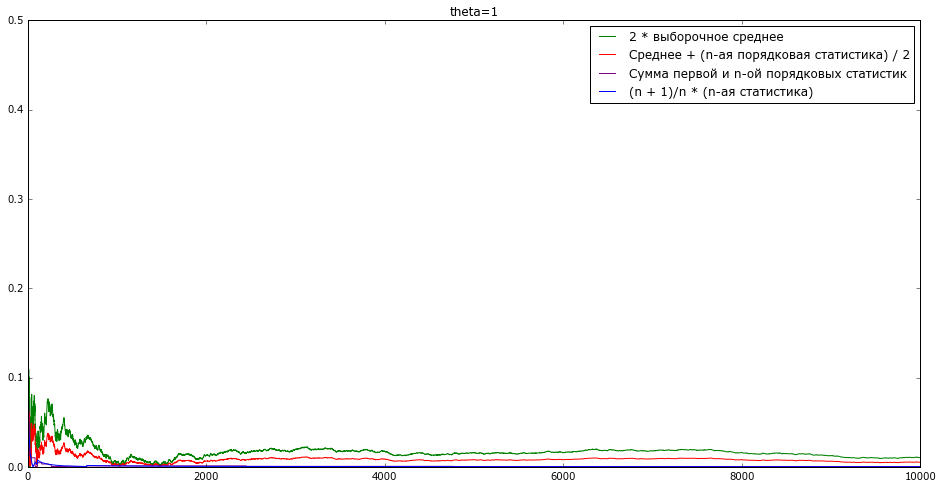

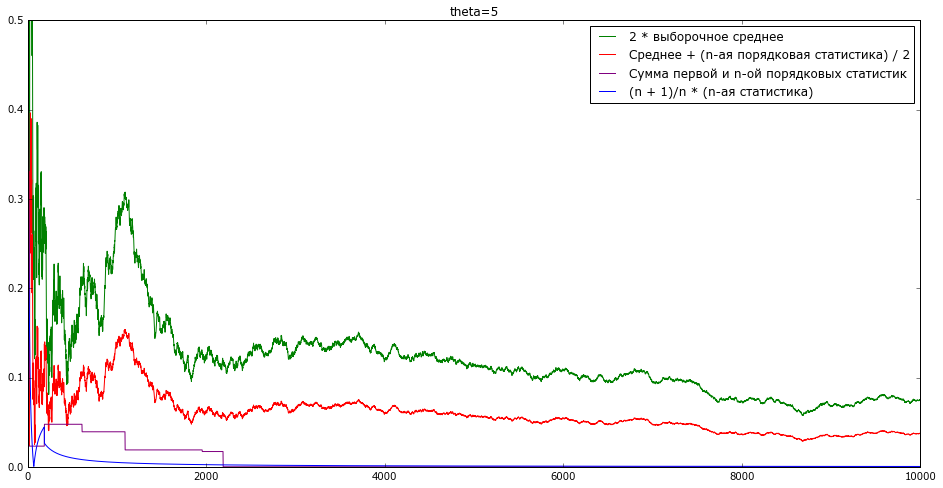

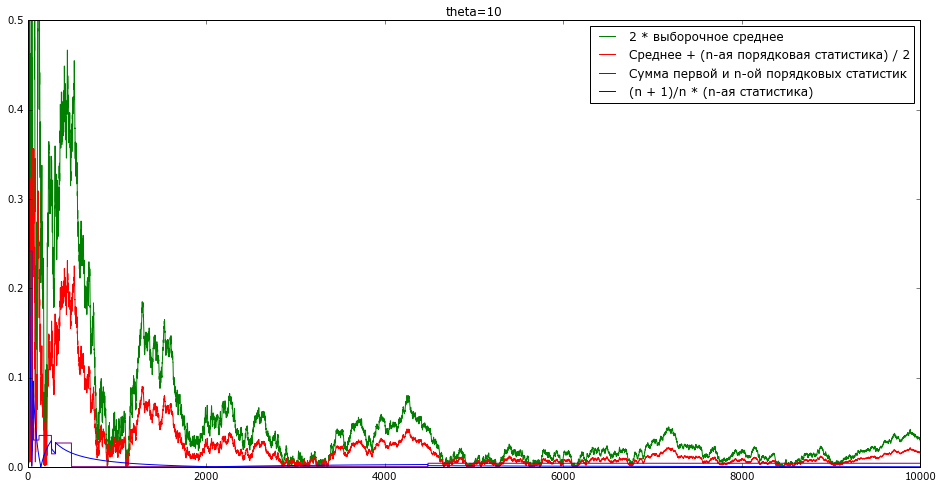

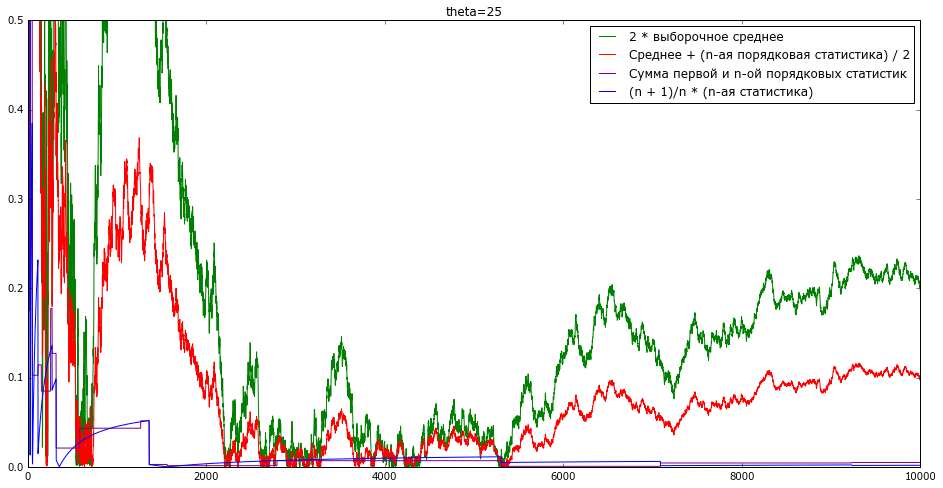

In [2]:
showEstimations(1)
showEstimations(5)
showEstimations(10)
showEstimations(25)